# 1- Compress a group of images that can be grouped into less number of images containing the common features (hint: search for eigen faces)


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [ ]:
data = datasets.fetch_olivetti_faces()
images = data.images
print(images.shape)
n_samples, h, w = images.shape
image_vectors = images.reshape(n_samples, -1)
print(image_vectors.shape)


(400, 64, 64)
(400, 4096)


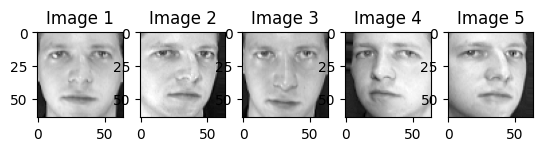

In [ ]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Image {i + 1}')

In [ ]:
scaler = StandardScaler()
standardized_images = scaler.fit_transform(image_vectors)

In [ ]:
covariance_matrix = np.cov(standardized_images, rowvar=False)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

In [ ]:
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_indices]
sorted_eigenvectors = eigen_vectors[:, sorted_indices]

In [ ]:
n_eigenfaces = 100
top_eigenfaces = sorted_eigenvectors[:, :n_eigenfaces]

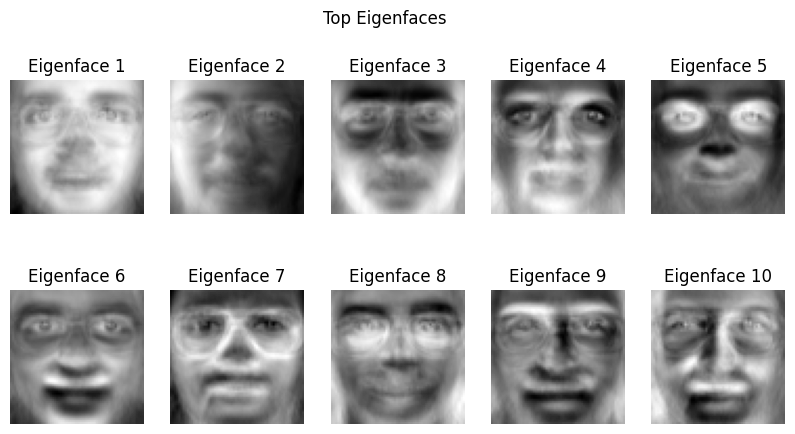

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    eigenface = top_eigenfaces[:, i].reshape(h, w)
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface, cmap='gray')
    plt.title(f'Eigenface {i + 1}')
    plt.axis('off')
plt.suptitle('Top Eigenfaces')
plt.show()

In [ ]:
sample_image = standardized_images[0]
compressed_representation = np.dot(sample_image, top_eigenfaces)
print(compressed_representation.shape)
reconstructed_image = np.dot(compressed_representation, top_eigenfaces.T)
reconstructed_image = reconstructed_image.reshape(1, -1)
reconstructed_image = scaler.inverse_transform(reconstructed_image)
reconstructed_image = reconstructed_image.reshape(h, w)

(100,)


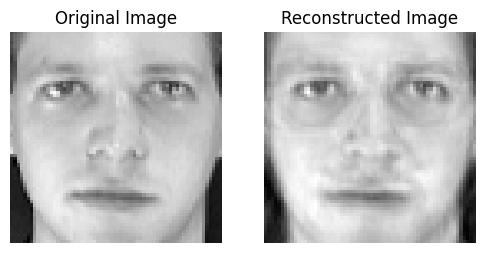

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(images[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()
